Összefoglaló.

Köszönjük, hogy fel lett töltve a az órai kód, és így én is aki lemaradt mert hibát jelzett a script is el tudta készíteni a + házit.

A házi feladatát egyáltalán nem értem.
Milyen különböző kombinációkat és eseteket vizsgáljunk?
Mi alapján döntsünk mi jó? 
Továbbiakban kommenteltem lentebb is.

In [43]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GBC  #Nem tudom mi ez pontosan de kipróbáljuk

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import plot_precision_recall_curve as ppc
from sklearn.metrics import plot_roc_curve as prc

from sklearn.model_selection import cross_validate as cv # ezt órán kihagytuk


A következő cellán mit kéne változtatni? 
Itt az adatokat töltjük be.
Próbáljam meg elrontani?

Ha kiszedem bármelyik sort akkor az adat nem lesz feldolgozható. Különösen ha az a dummies transzformáció.
Szóval én ehhez nem nyúlok.

In [69]:
l1 = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
l2 = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

train = pd.read_csv("data/train.csv")
train = train[l1]
train = pd.get_dummies(train)
train = train.fillna(train.median())

test = pd.read_csv("data/test.csv")
test = test[l2]
test = pd.get_dummies(test)
test = test.fillna(test.median())

res = pd.read_csv("data/gender_submission.csv")
res = res['Survived']


Y_train = np.array(train.iloc[:,[0]])
X_train = train.drop(train.iloc[:,[0]].columns,axis=1)






Itt a számok nemtudom pontosan mit jelentenek, de a GBC nél a legnagyobb szóval használjuk azt.
Kérdés. Itt miért jó a cv ? Mi előnyöm származik belőle? 

In [70]:
clf = DTC(random_state=42)
cv_res = cv(clf,X_train,Y_train,cv = 3)
print(cv_res)

clf = KNC(n_neighbors=2)
cv_res = cv(clf,X_train,Y_train,cv = 3)
print(cv_res)

clf = GBC()
cv_res = cv(clf,X_train,Y_train,cv = 3)
print(cv_res)

{'fit_time': array([0.0049839 , 0.00596952, 0.01001334]), 'score_time': array([0.00602126, 0.0029695 , 0.00498295]), 'test_score': array([0.73063973, 0.79124579, 0.75757576])}
{'fit_time': array([0.00497961, 0.0049901 , 0.00398779]), 'score_time': array([0.01994777, 0.0244782 , 0.02190208]), 'test_score': array([0.67003367, 0.68686869, 0.69360269])}
{'fit_time': array([0.00500774, 0.00498748, 0.00598526]), 'score_time': array([0.00297165, 0.00299048, 0.0030148 ]), 'test_score': array([0.76430976, 0.79461279, 0.78787879])}


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A col

A következő 2 cellához nemtudom mit tegyek hozzá vagy próbáljak ki, eléggé csak így működik.

In [71]:
#clf = KNC(n_neighbors=2)
#clf = DTC(random_state=42)
clf = GBC()
clf.fit(X_train,Y_train)

Y_test = clf.predict(test)
Y_test_proba = clf.predict_proba(test)[:,1]

d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
print(acc(res,Y_test))
print(auc(res,Y_test_proba)) # ez mivel másabb mint a sima predict? a kiírásra gondolok.

0.916267942583732
0.9427186387020182


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


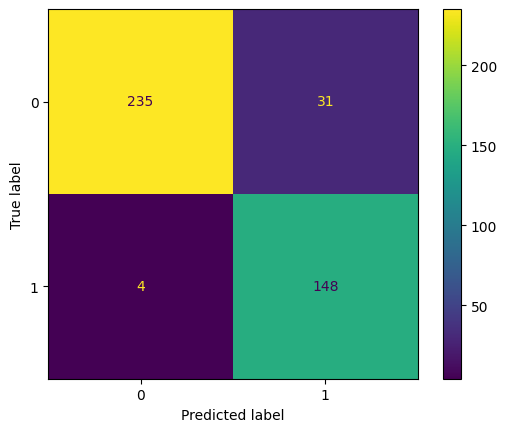

In [62]:
pcm(clf,test,res)# ezen mit változtassak? csak megjelenítés.

d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


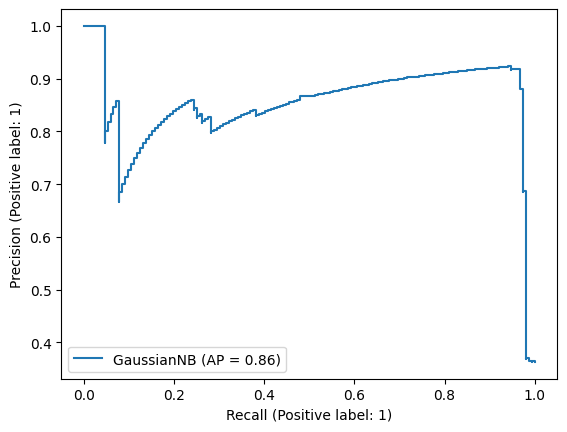

In [63]:
ppc(clf,test,res) # ahogy ez is. Mondjuk ezt és a következőt továbra sem értem miért jó.

d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


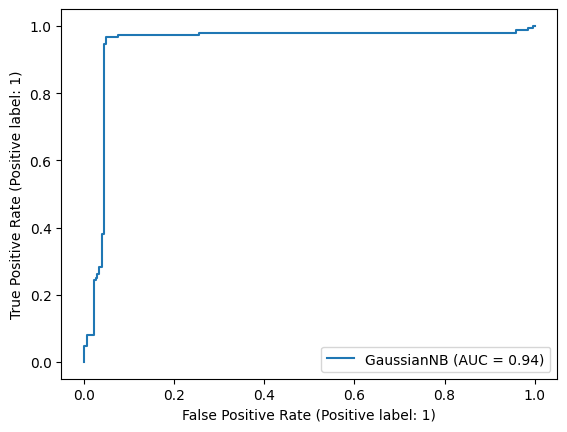

In [64]:
prc(clf,test,res)